# Final Project Submission

Please fill out:
* Student name: Hogan Byun
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
ls

CONTRIBUTING.md             README.md
LICENSE.md                  awesome.gif
Phase 1 Project Code.ipynb  zippedData/


In [3]:
# COLOR PALETTE HEX CODES FOR BAR GRAPHS: FOR PERSONAL REFERENCE
# Gray: #BFBFBF - Default Color
# Red: #F26B6B - Risk
# Blue: #69B2FA - Recommendation
# Green: #86F97B - Ideal Recommendation

## Loading Data
- remove any columns that seem unnecessary

In [4]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [5]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [6]:
title_ratings_df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [7]:
movies_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [8]:
# Noticed movies_df had a column named 'Unnamed: 0'
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
# Saw 'Unnamed: 0' does not provide valuable
# information and decided to drop it
movies_df.drop('Unnamed: 0', axis = 1, inplace = True)
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### Initial Data Cleaning and Preparation
- Look for NaN values and deal with accordingly

In [11]:
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
# runtime has significant NaN
# original_title and genres are less significant
title_basics_df.isna().sum() / len(title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [13]:
# not using runtime analysis in this project so drop column
title_basics_df.drop('runtime_minutes', axis = 1, inplace = True)

In [14]:
# it would take too much time to individally look up actual genres of movies
# and leaving NaN values is not desired. NaN in 'genres' only account for 3.7%
# of the values so just drop these rows. Drop all rows with original_title as NaN
title_basics_df.dropna(inplace = True)
title_basics_df.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

In [15]:
title_ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [16]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## What is the goal with the movie?
- Focus on return on investment
- Focus on profit


### Relationship between ROI and Profit

In [18]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
# convert money columns into int to access mathematical operators
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].map(
    lambda x: int(x[1:].replace(',','')))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].map(
    lambda x: int(x[1:].replace(',','')))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].map(
    lambda x: int(x[1:].replace(',','')))

In [20]:
# set a aside new dataframe for roi v profit analysis
# add profit and roi column
roi_profit_df = movie_budgets_df
roi_profit_df['profit'] = roi_profit_df['worldwide_gross'] - roi_profit_df['production_budget']
roi_profit_df['ROI'] = (roi_profit_df['profit'] / roi_profit_df['production_budget'] * 100)
roi_profit_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [21]:
# Correlation r = .07 - shows basically no relationship
roi_profit_df['profit'].corr(roi_profit_df['ROI'])

0.07043907998625079

[Text(0.5, 0, 'Profit ($1,000,000,000)'), Text(0, 0.5, 'ROI (%)')]

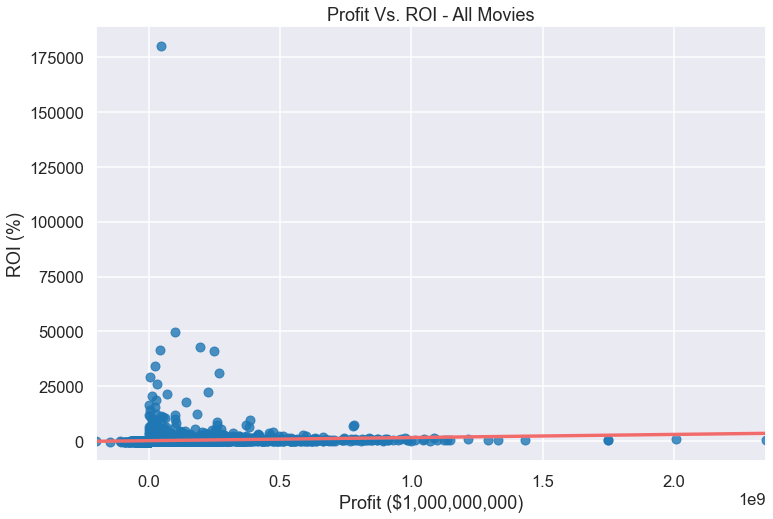

In [91]:
# scatter plot - add details to plot
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Profit Vs. ROI - All Movies')
ax = sns.regplot(x = 'profit', y = 'ROI', data = roi_profit_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})

ax.set(xlabel = 'Profit ($1,000,000,000)', ylabel = 'ROI (%)')

[Text(0.5, 0, 'Profit ($100,000,000)'), Text(0, 0.5, 'ROI (%)')]

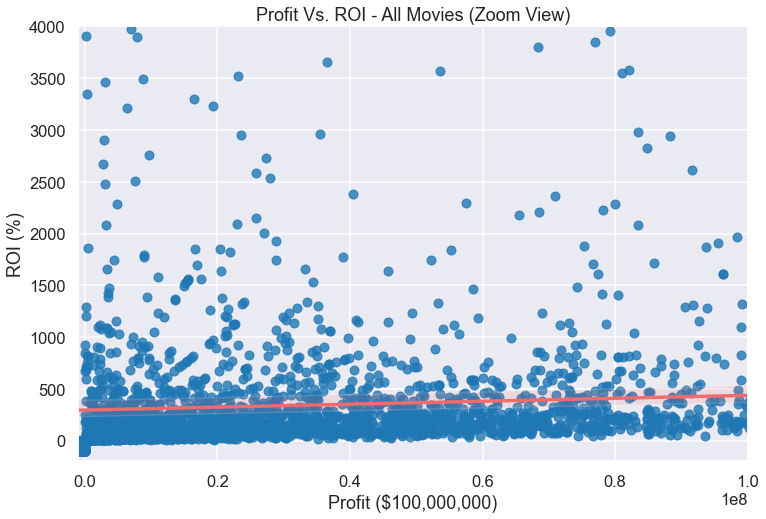

In [110]:
# re-plot data but zoom into bottom portion of plot
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Profit Vs. ROI - All Movies (Zoom View)')
ax = sns.regplot(x = 'profit', y = 'ROI', data = roi_profit_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})
ax.set_ylim([-200, 4000])
ax.set_xlim([-1000000, 100000000])
ax.set(xlabel = 'Profit ($100,000,000)', ylabel = 'ROI (%)')

### Relationship between media presence and ROI

In [54]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [55]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [56]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,start_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,2017


In [57]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [58]:
print(title_ratings_df.shape)
print(title_basics_df.shape)

(73856, 3)
(140734, 5)


In [61]:
# Need all 4 databases merged:
# Merge title_basics_df and title_ratings_df on tconst first
t_ratings_t_basics_df = pd.merge(title_ratings_df, title_basics_df, on = ['tconst'], how = 'inner')
print(t_ratings_t_basics_df.shape)
print(t_ratings_t_basics_df.isna().sum())
t_ratings_t_basics_df.head()

(73052, 7)
tconst            0
averagerating     0
numvotes          0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64


,tconst,averagerating,numvotes,primary_title,original_title,start_year,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,"Mystery,Thriller"


In [62]:
movies_df.shape

(26517, 10)

In [63]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [64]:
movies_df['release_date'][0][:4]

'2010'

In [65]:
# extract just the year and place into a new column
movies_df['release_year'] = movies_df['release_date'].map(lambda x: x[:4])
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [66]:
# convert the year column to a string to match that of movies_df
t_ratings_t_basics_df['start_year'] = t_ratings_t_basics_df['start_year'].map(lambda x: str(x))

In [69]:
# Next, join with movies_df on year and movie name
ratings_basics_m_df = pd.merge(t_ratings_t_basics_df, movies_df, left_on = ['primary_title', 'start_year'],
                               right_on = ['original_title', 'release_year'], how = 'inner')
print(ratings_basics_m_df.shape)
print(ratings_basics_m_df.isna().sum())
ratings_basics_m_df.head()

(11613, 17)
tconst               0
averagerating        0
numvotes             0
primary_title        0
original_title_x     0
start_year           0
genres               0
genre_ids            0
id                   0
original_language    0
original_title_y     0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
release_year         0
dtype: int64


,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count,release_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[28, 12]",188207,en,The Legend of Hercules,13.754,2014-01-10,The Legend of Hercules,4.5,805,2014
1,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,"Comedy,Romance","[35, 10749]",55961,es,Habana Eva,1.400,2010-05-28,Habana Eva,7.0,4,2010
2,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,[35],175528,en,Baggage Claim,8.666,2013-09-27,Baggage Claim,5.4,127,2013
3,tt1174693,5.8,2381,The Four-Faced Liar,The Four-Faced Liar,2010,"Comedy,Drama,Romance","[35, 18, 10749]",44991,en,The Four-Faced Liar,3.091,2010-01-01,The Four-Faced Liar,5.3,25,2010
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",[18],60308,en,Moneyball,15.393,2011-09-22,Moneyball,7.1,2255,2011


In [70]:
# extract year from movie_budgets_df and place into new column
movie_budgets_df['start_year'] = movie_budgets_df['release_date'].map(lambda x: str(x[-4:]))

In [71]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,start_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,2017


In [72]:
# lastly, merge with movie_budgets_df on year and movie name
media_roi_df = pd.merge(ratings_basics_m_df, movie_budgets_df, left_on = ['primary_title', 'start_year'],
                               right_on = ['movie', 'start_year'], how = 'inner')
print(media_roi_df.shape)
print(media_roi_df.isna().sum())
media_roi_df.head()

(1497, 25)
tconst               0
averagerating        0
numvotes             0
primary_title        0
original_title_x     0
start_year           0
genres               0
genre_ids            0
id_x                 0
original_language    0
original_title_y     0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
release_year         0
id_y                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
ROI                  0
dtype: int64


,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,vote_count,release_year,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[28, 12]",188207,en,...,805,2014,42,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319,-11046681,-15.780973
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,[35],175528,en,...,127,2013,38,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836,14385836,169.245129
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",[18],60308,en,...,2255,2011,15,"Sep 23, 2011",Moneyball,50000000,75605492,111300835,61300835,122.601670
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,"Drama,Fantasy,Romance","[18, 14]",44603,en,...,848,2010,61,"Oct 15, 2010",Hereafter,50000000,32746941,108660270,58660270,117.320540
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,"Action,Comedy,Crime","[28, 35, 80]",64688,en,...,6527,2012,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,160812429,382.886736


In [73]:
media_roi_df['total_votes'] = media_roi_df['numvotes'] + media_roi_df['vote_count']
media_roi_df['final_avg_rating'] = ((media_roi_df['averagerating']*media_roi_df['numvotes']
                                    + media_roi_df['vote_average']*media_roi_df['vote_count']) / 
                                    media_roi_df['total_votes'])
media_roi_df.head()

,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,total_votes,final_avg_rating
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[28, 12]",188207,en,...,42,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319,-11046681,-15.780973,51157,4.204721
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,[35],175528,en,...,38,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836,14385836,169.245129,8423,5.104523
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",[18],60308,en,...,15,"Sep 23, 2011",Moneyball,50000000,75605492,111300835,61300835,122.601670,328912,7.596572
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,"Drama,Fantasy,Romance","[18, 14]",44603,en,...,61,"Oct 15, 2010",Hereafter,50000000,32746941,108660270,58660270,117.320540,88136,6.494227
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,"Action,Comedy,Crime","[28, 35, 80]",64688,en,...,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,160812429,382.886736,484298,7.194609


In [74]:
# add an ROI column
media_roi_df['roi'] = ((media_roi_df['worldwide_gross'] - media_roi_df['production_budget']) / 
                        media_roi_df['production_budget']) * 100
media_roi_df['profit'] = (media_roi_df['worldwide_gross'] - media_roi_df['production_budget'])
media_roi_df.head()

,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,total_votes,final_avg_rating,roi
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[28, 12]",188207,en,...,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319,-11046681,-15.780973,51157,4.204721,-15.780973
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,[35],175528,en,...,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836,14385836,169.245129,8423,5.104523,169.245129
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",[18],60308,en,...,"Sep 23, 2011",Moneyball,50000000,75605492,111300835,61300835,122.601670,328912,7.596572,122.601670
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,"Drama,Fantasy,Romance","[18, 14]",44603,en,...,"Oct 15, 2010",Hereafter,50000000,32746941,108660270,58660270,117.320540,88136,6.494227,117.320540
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,"Action,Comedy,Crime","[28, 35, 80]",64688,en,...,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,160812429,382.886736,484298,7.194609,382.886736


[Text(0.5, 0, 'Number of Votes (Hundred Thousands)'), Text(0, 0.5, 'ROI (%)')]

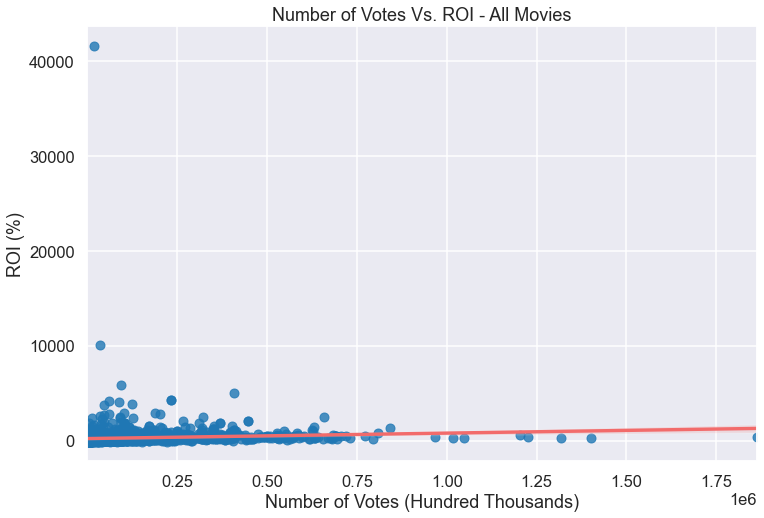

In [89]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes Vs. ROI - All Movies')
ax = sns.regplot(x = 'total_votes', y = 'roi', data = media_roi_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})

ax.set(xlabel = 'Number of Votes (Hundred Thousands)', ylabel = 'ROI (%)')

[Text(0.5, 0, 'Number of Votes (millions)'), Text(0, 0.5, 'ROI (%)')]

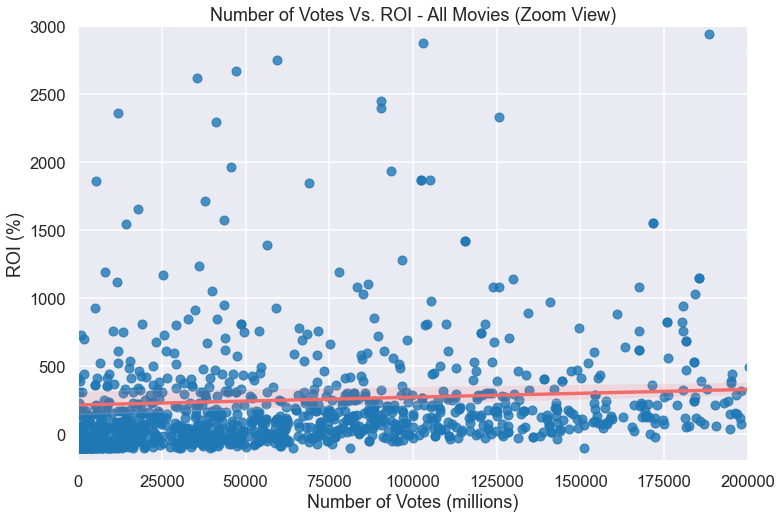

In [126]:
# new plot zoomed in to bottom area 
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes Vs. ROI - All Movies (Zoom View)')
ax = sns.regplot(x = 'total_votes', y = 'roi', data = media_roi_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})
ax.set_ylim([-200, 3000])
ax.set_xlim([0, 200000])
ax.set(xlabel = 'Number of Votes (millions)', ylabel = 'ROI (%)')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'ROI (%)')]

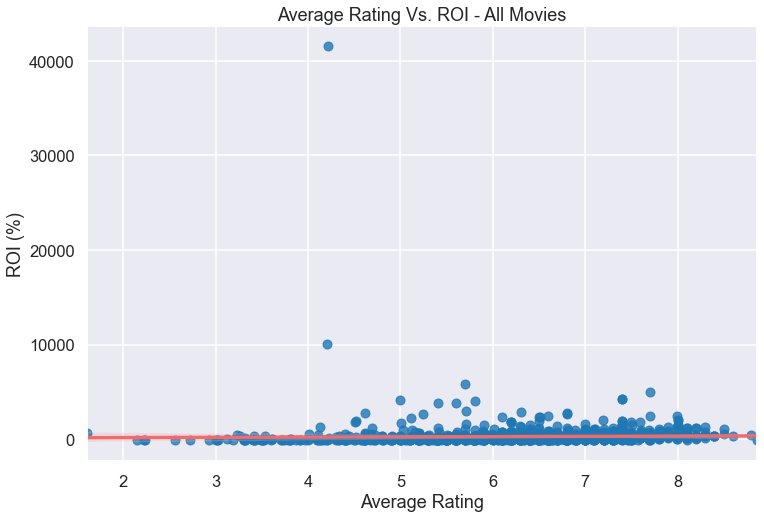

In [82]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Average Rating Vs. ROI - All Movies')
ax = sns.regplot(x = 'final_avg_rating', y = 'roi', data = media_roi_df, fit_reg=True, scatter=True,
                 line_kws = {"color": "#F26B6B"})

ax.set(xlabel = 'Average Rating', ylabel = 'ROI (%)')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'ROI (%)')]

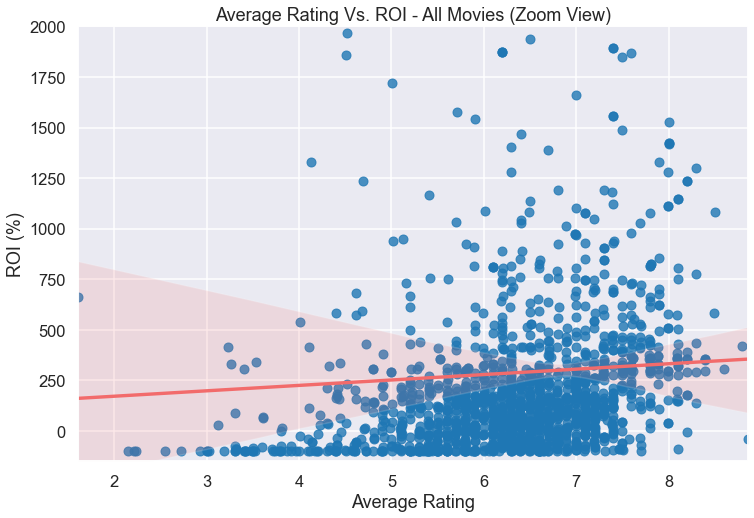

In [111]:
# New plot without outliers
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Average Rating Vs. ROI - All Movies (Zoom View)')
ax = sns.regplot(x = 'final_avg_rating', y = 'roi', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax.set_ylim([-150, 2000])
ax.set(xlabel = 'Average Rating', ylabel = 'ROI (%)')

### Relationship between media presence and profit

In [359]:
# Data is collected above - only need to plot for this section

[Text(0.5, 0, 'Number of Votes (millions)'),
 Text(0, 0.5, 'Profit ($1,000,000,000)')]

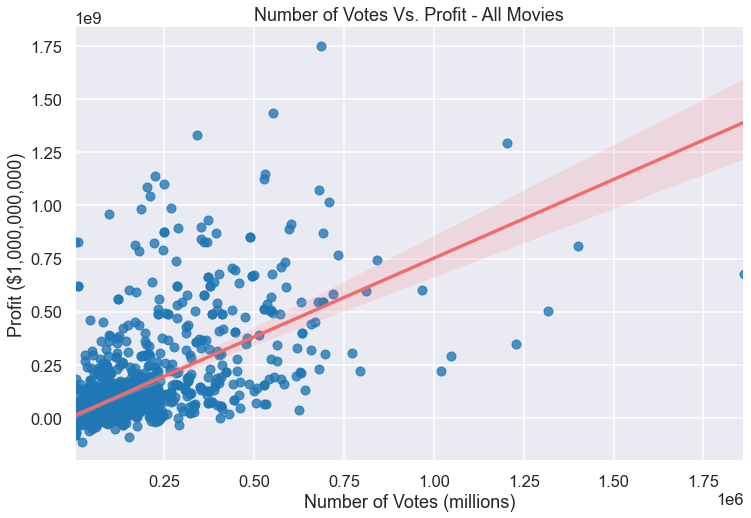

In [96]:
# same plot format as above section
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes Vs. Profit - All Movies')
ax = sns.regplot(x = 'total_votes', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax.set(xlabel = 'Number of Votes (millions)', ylabel = 'Profit ($1,000,000,000)')

[Text(0.5, 0, 'Number of Votes (millions)'),
 Text(0, 0.5, 'Profit ($1,000,000,000)')]

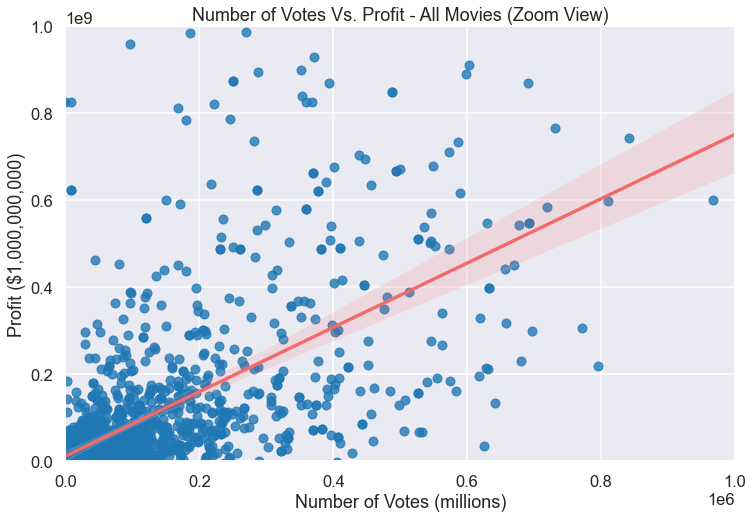

In [99]:
# same plot format as above section
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes Vs. Profit - All Movies (Zoom View)')
ax = sns.regplot(x = 'total_votes', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax.set_xlim([0, 1000000])
ax.set_ylim([-100000, 1000000000])
ax.set(xlabel = 'Number of Votes (millions)', ylabel = 'Profit ($1,000,000,000)')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Profit ($1,000,000,000)')]

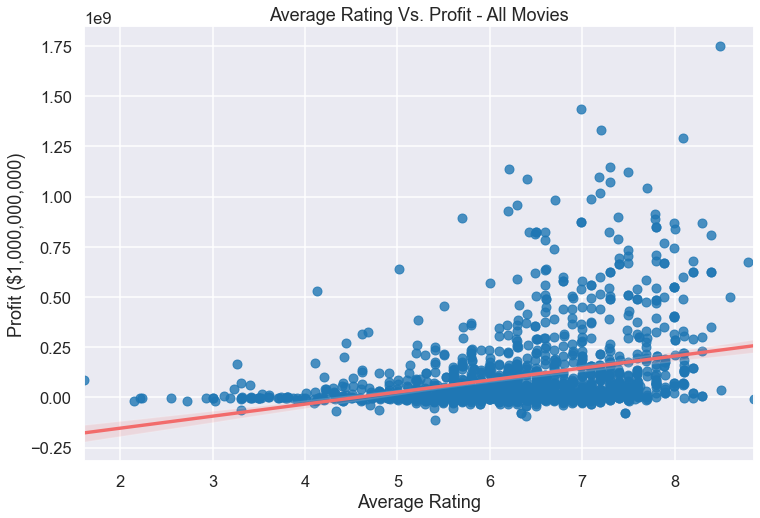

In [108]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Average Rating Vs. Profit - All Movies')
ax = sns.regplot(x = 'final_avg_rating', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax.set(xlabel = 'Average Rating', ylabel = 'Profit ($1,000,000,000)')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Profit ($1,000,000,000)')]

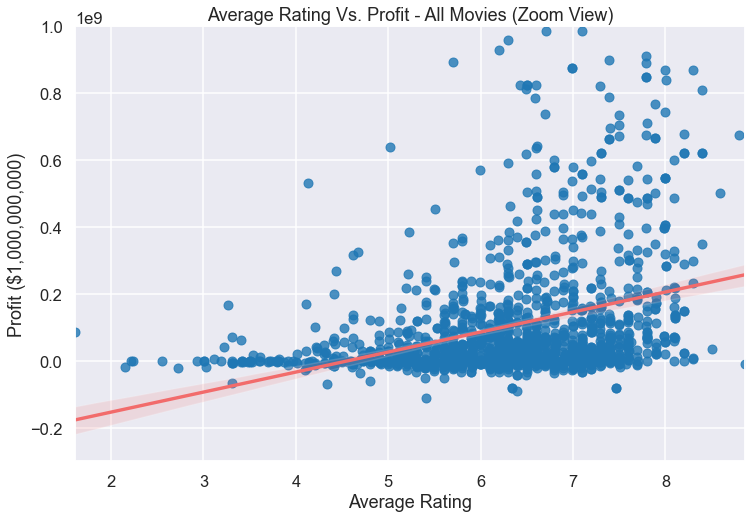

In [109]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Average Rating Vs. Profit - All Movies (Zoom View)')
ax = sns.regplot(x = 'final_avg_rating', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax.set_ylim([-300000000, 1000000000])
ax.set(xlabel = 'Average Rating', ylabel = 'Profit ($1,000,000,000)')

### Plot for presentation

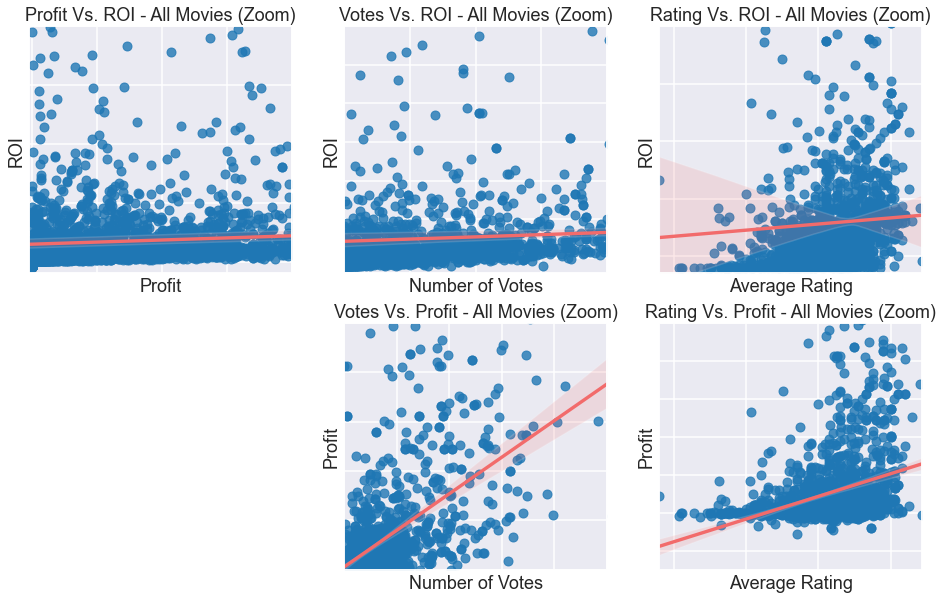

In [128]:
# Visual for slides
fig = plt.figure(figsize = (16, 10))
sns.set_style("darkgrid")
sns.set_context("talk")
#plt.subplots_adjust(wspace = 0.9)
fig.tight_layout()
# subplot for ROI v Profit
ax1 = plt.subplot(2,3,1)
plt.title('Profit Vs. ROI - All Movies (Zoom)')
plt.tick_params(labelbottom = False, labelleft = False)
ax1 = sns.regplot(x = 'profit', y = 'ROI', data = roi_profit_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})
ax1.set_ylim([-200, 4000])
ax1.set_xlim([-1000000, 100000000])
ax1.set(xlabel = 'Profit', ylabel = 'ROI')

# subplot for Votes V ROI
ax2 = plt.subplot(2,3,2)
plt.title('Votes Vs. ROI - All Movies (Zoom)')
plt.tick_params(labelbottom = False, labelleft = False)
ax2 = sns.regplot(x = 'total_votes', y = 'roi', data = media_roi_df, fit_reg = True, scatter = True, 
                 line_kws = {"color": "#F26B6B"})
ax2.set_ylim([-200, 3000])
ax2.set_xlim([0, 200000])
ax2.set(xlabel = 'Number of Votes', ylabel = 'ROI')

# subplot for Rating V ROI
ax3 = plt.subplot(2,3,3)
plt.title('Rating Vs. ROI - All Movies (Zoom)')
plt.tick_params(labelbottom = False, labelleft = False)
ax3 = sns.regplot(x = 'final_avg_rating', y = 'roi', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax3.set_ylim([-150, 2000])
ax3.set(xlabel = 'Average Rating', ylabel = 'ROI')

# subplot for Votes V Profit
ax4 = plt.subplot(2,3,5)
plt.title('Votes Vs. Profit - All Movies (Zoom)')
plt.tick_params(labelbottom = False, labelleft = False)
ax4 = sns.regplot(x = 'total_votes', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax4.set_xlim([0, 1000000])
ax4.set_ylim([-100000, 1000000000])
ax4.set(xlabel = 'Number of Votes', ylabel = 'Profit')

# subplot for Rating V Profit
ax5 = plt.subplot(2,3,6)
plt.title('Rating Vs. Profit - All Movies (Zoom)')
plt.tick_params(labelbottom = False, labelleft = False)
ax5 = sns.regplot(x = 'final_avg_rating', y = 'profit', data = media_roi_df, fit_reg = True, scatter = True,
                line_kws = {"color": "#F26B6B"})
ax5.set_ylim([-300000000, 1000000000])
ax5.set(xlabel = 'Average Rating', ylabel = 'Profit')

#plt.savefig('Goals_slide.png')


## What movie genres are best to achieve the respective goal?

### Maximize ROI

In [130]:
# split genres into list for each movie
media_roi_df['genres_split'] = media_roi_df['genres'].map(lambda x: x.split(",") if x else x)
media_roi_df.head()

,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,total_votes,final_avg_rating,roi,genres_split
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[28, 12]",188207,en,...,The Legend of Hercules,70000000,18848538,58953319,-11046681,-15.780973,51157,4.204721,-15.780973,"[Action, Adventure, Fantasy]"
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,[35],175528,en,...,Baggage Claim,8500000,21569509,22885836,14385836,169.245129,8423,5.104523,169.245129,[Comedy]
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",[18],60308,en,...,Moneyball,50000000,75605492,111300835,61300835,122.601670,328912,7.596572,122.601670,"[Biography, Drama, Sport]"
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,"Drama,Fantasy,Romance","[18, 14]",44603,en,...,Hereafter,50000000,32746941,108660270,58660270,117.320540,88136,6.494227,117.320540,"[Drama, Fantasy, Romance]"
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,"Action,Comedy,Crime","[28, 35, 80]",64688,en,...,21 Jump Street,42000000,138447667,202812429,160812429,382.886736,484298,7.194609,382.886736,"[Action, Comedy, Crime]"


In [131]:
# sort by ROI
roi_sorted_df = media_roi_df.sort_values(by = 'roi', ascending = False)
roi_sorted_df.head()

,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,total_votes,final_avg_rating,roi,genres_split
1056,tt2309260,4.2,17763,The Gallows,The Gallows,2015,"Horror,Mystery,Thriller","[27, 53]",299245,en,...,The Gallows,100000,22764410,41656474,41556474,41556.474000,18354,4.219320,41556.474000,"[Horror, Mystery, Thriller]"
366,tt1560985,4.2,33522,The Devil Inside,The Devil Inside,2012,Horror,"[53, 27]",76487,en,...,The Devil Inside,1000000,53262945,101759490,100759490,10075.949000,33963,4.206492,10075.949000,[Horror]
236,tt1536044,5.7,93122,Paranormal Activity 2,Paranormal Activity 2,2010,Horror,"[27, 53]",41436,en,...,Paranormal Activity 2,3000000,84752907,177512032,174512032,5817.067733,94464,5.700000,5817.067733,[Horror]
995,tt5052448,7.7,400474,Get Out,Get Out,2017,"Horror,Mystery,Thriller","[9648, 53, 27]",419430,en,...,Get Out,5000000,176040665,255367951,250367951,5007.359020,409234,7.695719,5007.359020,"[Horror, Mystery, Thriller]"
188,tt4975722,7.4,227964,Moonlight,Moonlight,2016,Drama,[18],376867,en,...,Moonlight,1500000,27854931,65245512,63745512,4249.700800,231857,7.400000,4249.700800,[Drama]


In [132]:
# get top 500 movies
top_roi_sorted_df = roi_sorted_df[0:500]
top_roi_sorted_df.shape

(500, 29)

In [133]:
# create a dataframe that counts every single genre that appears in top
roi_genres_df = pd.DataFrame(columns=['genre'])
count = 0
for genre_list in top_roi_sorted_df['genres_split']:
    for genre in genre_list:
        roi_genres_df.loc[count] = genre
        count += 1
roi_genres_df.head()

,genre
0,Horror
1,Mystery
2,Thriller
3,Horror
4,Horror


In [134]:
roi_genres_df.value_counts()

genre      
Drama          231
Comedy         168
Adventure      135
Action         128
Thriller        98
Horror          79
Romance         66
Mystery         65
Sci-Fi          57
Crime           54
Biography       54
Animation       47
Fantasy         42
Family          25
History         18
Music           17
Documentary      7
Musical          5
Sport            5
War              2
Western          2
dtype: int64

In [135]:
roi_genres_df['genre'][0]

'Horror'

In [136]:
# convert value_counts into a DataFrame for plotting
roi_genres_total_df = roi_genres_df.value_counts().reset_index(name = 'num_movies')
roi_genres_total_df


,genre,num_movies
0,Drama,231
1,Comedy,168
2,Adventure,135
3,Action,128
4,Thriller,98
5,Horror,79
6,Romance,66
7,Mystery,65
8,Sci-Fi,57
9,Crime,54


In [137]:
# set up a new palette
# highlight top 2 as green, next top 2 as blue
clrs = ['#86F97B' if (x >= roi_genres_total_df['num_movies'][1]) else '#BFBFBF' if 
        (x < roi_genres_total_df['num_movies'][3]) else '#69B2FA' for x in roi_genres_total_df['num_movies']]


[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Frequency')]

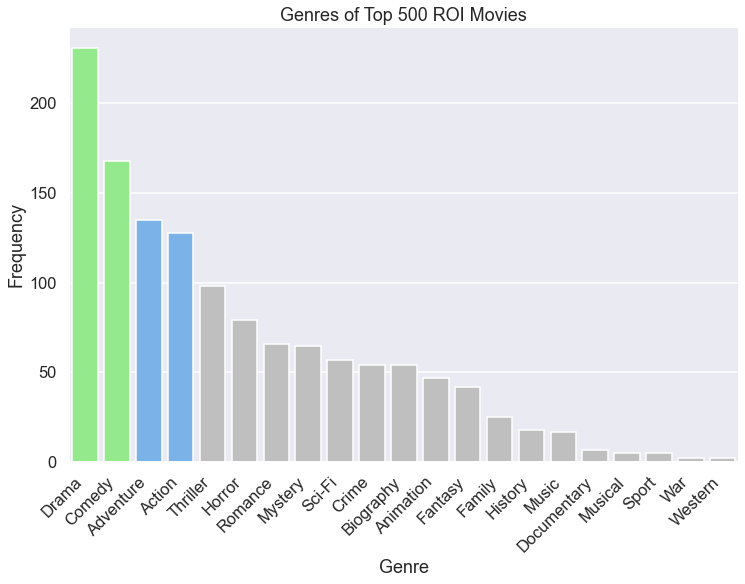

In [147]:
# plot frequency of genres
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Genres of Top 500 ROI Movies')
ax = sns.barplot(x = 'genre', y = 'num_movies', data = roi_genres_total_df, palette = clrs)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set(xlabel = 'Genre', ylabel = 'Frequency')

#plt.savefig('ROI_Genre.png')

### Maximize Profit

In [139]:
# sort by profit
profit_sorted_df = media_roi_df.sort_values(by = 'profit', ascending = False)
profit_sorted_df.head(10)

,tconst,averagerating,numvotes,primary_title,original_title_x,start_year,genres,genre_ids,id_x,original_language,...,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,total_votes,final_avg_rating,roi,genres_split
1469,tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi","[12, 28, 14]",299536,en,...,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,684874,8.495927,582.711400,"[Action, Adventure, Sci-Fi]"
192,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi","[28, 12, 878, 53]",135397,en,...,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239,553394,6.989840,666.909239,"[Action, Adventure, Sci-Fi]"
338,tt2820852,7.2,335074,Furious 7,Furious Seven,2015,"Action,Crime,Thriller","[28, 80, 53]",168259,en,...,Furious 7,190000000,353007020,1518722794,1328722794,699.327786,341612,7.201914,699.327786,"[Action, Crime, Thriller]"
997,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi","[878, 28, 12]",24428,en,...,The Avengers,225000000,623279547,1517935897,1292935897,574.638176,1203328,8.091826,574.638176,"[Action, Adventure, Sci-Fi]"
247,tt1825683,7.3,516148,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi","[28, 12, 14, 878]",284054,en,...,Black Panther,200000000,700059566,1348258224,1148258224,574.129112,528513,7.302340,574.129112,"[Action, Adventure, Sci-Fi]"
219,tt4881806,6.2,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi","[28, 12, 878]",351286,en,...,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,668.101646,225120,6.207989,668.101646,"[Action, Adventure, Sci-Fi]"
1267,tt2294629,7.5,516998,Frozen,Frozen,2013,"Adventure,Animation,Comedy","[16, 12, 10751]",109445,en,...,Frozen,150000000,400738009,1272469910,1122469910,748.313273,526765,7.496292,748.313273,"[Adventure, Animation, Comedy]"
809,tt2771200,7.2,238325,Beauty and the Beast,Beauty and the Beast,2017,"Family,Fantasy,Musical","[10751, 14, 10749]",321612,en,...,Beauty and the Beast,160000000,504014165,1259199706,1099199706,686.999816,249348,7.186738,686.999816,"[Family, Fantasy, Musical]"
898,tt2293640,6.4,193917,Minions,Minions,2015,"Adventure,Animation,Comedy","[10751, 16, 12, 35]",211672,en,...,Minions,74000000,336045770,1160336173,1086336173,1468.021855,201260,6.400000,1468.021855,"[Adventure, Animation, Comedy]"
1358,tt2395427,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi","[28, 12, 878]",99861,en,...,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,679051,7.300000,324.384139,"[Action, Adventure, Sci-Fi]"


In [140]:
# get top 500 movies
top_profit_sorted_df = profit_sorted_df[0:500]


In [141]:
# create a dataframe that counts every single genre that appears in top 500 movies
profit_genres_df = pd.DataFrame(columns=['genre'])
count = 0
for genre_list in top_profit_sorted_df['genres_split']:
    for genre in genre_list:
        profit_genres_df.loc[count] = genre
        count += 1
profit_genres_df.head()

,genre
0,Action
1,Adventure
2,Sci-Fi
3,Action
4,Adventure


In [142]:
profit_genres_df.value_counts()

genre      
Adventure      224
Action         206
Comedy         183
Drama          156
Thriller        82
Sci-Fi          79
Animation       78
Fantasy         53
Crime           52
Horror          44
Romance         43
Mystery         42
Biography       42
Family          37
History         18
Music           11
Musical          5
Sport            5
War              4
Documentary      3
Western          2
dtype: int64

In [143]:
# convert value_counts into a DataFrame for plotting
profit_genres_total_df = profit_genres_df.value_counts().reset_index(name = 'num_movies')
profit_genres_total_df


,genre,num_movies
0,Adventure,224
1,Action,206
2,Comedy,183
3,Drama,156
4,Thriller,82
5,Sci-Fi,79
6,Animation,78
7,Fantasy,53
8,Crime,52
9,Horror,44


In [144]:
# set up a new palette
# highlight top 2 as green, next top 2 as blue
clrs = ['#86F97B' if (x >= profit_genres_total_df['num_movies'][1]) else '#BFBFBF' if 
        (x < profit_genres_total_df['num_movies'][3]) else '#69B2FA' for x in profit_genres_total_df['num_movies']]

[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Frequency')]

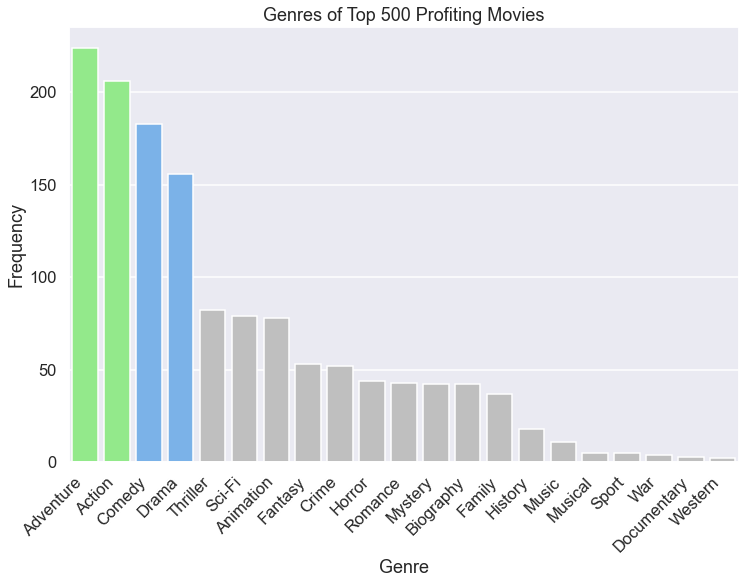

In [148]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Genres of Top 500 Profiting Movies')
ax = sns.barplot(x = 'genre', y = 'num_movies', data = profit_genres_total_df, palette = clrs)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set(xlabel = 'Genre', ylabel = 'Frequency')

#plt.savefig('Genre_profit.png')

In [149]:
# Recommend making drama, comedy, action, or adventure
# if going for profit + media attention: action or adventure
# if going for roi: drama or comedy

## What should the budget be?

In [150]:
media_roi_df.loc[0]['genres_split'].count('Action')


1

In [151]:
media_roi_df.columns


Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title_x', 'start_year', 'genres', 'genre_ids', 'id_x',
       'original_language', 'original_title_y', 'popularity', 'release_date_x',
       'title', 'vote_average', 'vote_count', 'release_year', 'id_y',
       'release_date_y', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit', 'ROI', 'total_votes', 'final_avg_rating',
       'roi', 'genres_split'],
      dtype='object')

In [152]:
# first, filter media_roi_df into 4 dataframes of respective genre
action_df = pd.DataFrame()
adventure_df = pd.DataFrame()
drama_df = pd.DataFrame()
comedy_df = pd.DataFrame()

# use for loop to count number of times a respective genre shows up
for row in range(media_roi_df.shape[0]):
    if media_roi_df.loc[row]['genres_split'].count('Action') > 0:
        action_df = action_df.append(media_roi_df.loc[row])
    # Don't use elif because different genres may be found in the same movie
    if media_roi_df.loc[row]['genres_split'].count('Adventure') > 0:
        adventure_df = adventure_df.append(media_roi_df.loc[row])
    if media_roi_df.loc[row]['genres_split'].count('Drama') > 0:
        drama_df = drama_df.append(media_roi_df.loc[row])
    if media_roi_df.loc[row]['genres_split'].count('Comedy') > 0:
        comedy_df = comedy_df.append(media_roi_df.loc[row])
drama_df.head()

,ROI,averagerating,domestic_gross,final_avg_rating,genre_ids,genres,genres_split,id_x,id_y,movie,...,release_date_y,release_year,roi,start_year,tconst,title,total_votes,vote_average,vote_count,worldwide_gross
2,122.601670,7.6,75605492.0,7.596572,[18],"Biography,Drama,Sport","[Biography, Drama, Sport]",60308.0,15.0,Moneyball,...,"Sep 23, 2011",2011,122.601670,2011,tt1210166,Moneyball,328912.0,7.1,2255.0,111300835.0
3,117.320540,6.5,32746941.0,6.494227,"[18, 14]","Drama,Fantasy,Romance","[Drama, Fantasy, Romance]",44603.0,61.0,Hereafter,...,"Oct 15, 2010",2010,117.320540,2010,tt1212419,Hereafter,88136.0,5.9,848.0,108660270.0
5,-31.386241,5.4,21052030.0,5.397806,"[18, 35, 10749]","Comedy,Drama,Romance","[Comedy, Drama, Romance]",222936.0,3.0,Aloha,...,"May 29, 2015",2015,-31.386241,2015,tt1243974,Aloha,55872.0,5.3,1226.0,25387091.0
6,210.190293,4.4,95347692.0,4.417334,"[35, 18, 10749]","Comedy,Drama,Romance","[Comedy, Drama, Romance]",37786.0,16.0,Sex and the City 2,...,"May 27, 2010",2010,210.190293,2010,tt1261945,Sex and the City 2,70008.0,5.9,809.0,294680778.0
8,253.163250,7.1,19068240.0,7.100000,"[18, 10749]","Drama,Romance","[Drama, Romance]",23169.0,51.0,Remember Me,...,"Mar 12, 2010",2010,253.163250,2010,tt1403981,Remember Me,131522.0,7.1,2079.0,56506120.0


### If focused on profit: Action/Adventure

In [153]:
action_df['production_budget'].corr(action_df['profit'])

# weak correlation


0.6679042306673173

[Text(0.5, 0, 'Budget'), Text(0, 0.5, 'Profit')]

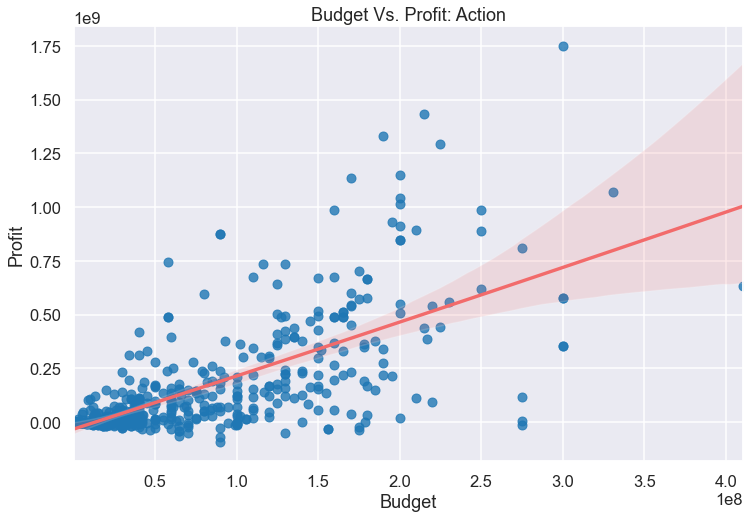

In [154]:
# regression plot to see whether there is a positive, negative, neutral relationship between
# budget and profit
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. Profit: Action')
ax = sns.regplot(x = 'production_budget', y = 'profit', data = action_df, order = 2, scatter = True,
                line_kws={"color": "#F26B6B"})

ax.set(xlabel = 'Budget', ylabel = 'Profit')

In [155]:
action_df['production_budget'].max()


410600000.0

In [156]:
action_df.sort_values(by = 'production_budget', ascending = False)

,ROI,averagerating,domestic_gross,final_avg_rating,genre_ids,genres,genres_split,id_x,id_y,movie,...,release_date_y,release_year,roi,start_year,tconst,title,total_votes,vote_average,vote_count,worldwide_gross
69,154.667286,6.6,241063875.0,6.596242,"[12, 28, 14]","Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",1865.0,2.0,Pirates of the Caribbean: On Stranger Tides,...,"May 20, 2011",2011,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,456195.0,6.4,8571.0,1.045664e+09
1358,324.384139,7.3,459005868.0,7.300000,"[28, 12, 878]","Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",99861.0,4.0,Avengers: Age of Ultron,...,"May 1, 2015",2015,324.384139,2015,tt2395427,Avengers: Age of Ultron,679051.0,7.3,13457.0,1.403014e+09
1469,582.711400,8.5,678815482.0,8.495927,"[12, 28, 14]","Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",299536.0,7.0,Avengers: Infinity War,...,"Apr 27, 2018",2018,582.711400,2018,tt4154756,Avengers: Infinity War,684874.0,8.3,13948.0,2.048134e+09
1058,193.206974,6.8,200074175.0,6.792518,"[28, 12, 80]","Action,Adventure,Thriller","[Action, Adventure, Thriller]",206647.0,10.0,Spectre,...,"Nov 6, 2015",2015,193.206974,2015,tt2379713,Spectre,359223.0,6.4,6719.0,8.796209e+08
819,118.648403,6.5,229024295.0,6.493307,"[28, 12, 14, 878]","Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",141052.0,9.0,Justice League,...,"Nov 17, 2017",2017,118.648403,2017,tt0974015,Justice League,336645.0,6.2,7510.0,6.559452e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,-100.000000,2.2,0.0,2.219091,"[28, 53, 9648]","Action,Mystery,Thriller","[Action, Mystery, Thriller]",322194.0,78.0,Subconscious,...,"Mar 10, 2015",2015,-100.000000,2015,tt2909932,Subconscious,330.0,3.1,7.0,0.000000e+00
847,-99.635600,6.7,1822.0,6.651020,[99],"Action,Biography,Documentary","[Action, Biography, Documentary]",253261.0,65.0,Born to Fly: Elizabeth Streb vs. Gravity,...,"Sep 10, 2014",2014,-99.635600,2014,tt2246526,Born to Fly: Elizabeth Streb vs. Gravity,49.0,5.5,2.0,1.822000e+03
1025,-100.000000,4.0,0.0,3.971429,"[27, 28]","Action,Horror","[Action, Horror]",325123.0,63.0,Teeth and Blood,...,"Mar 10, 2015",2015,-100.000000,2015,tt1991199,Teeth and Blood,35.0,3.0,1.0,0.000000e+00
561,730.307895,4.0,484592.0,5.154598,"[18, 10749]","Action,Comedy,Crime","[Action, Comedy, Crime]",79120.0,43.0,Weekend,...,"Sep 23, 2011",2011,730.307895,2011,tt1791679,Weekend,870.0,7.5,287.0,1.577585e+06


In [157]:
action_df['production_budget'].min()

75000.0

In [158]:
action_df[(action_df['production_budget'] > 250000000) & (action_df['production_budget'] < 300000000)]['profit'].shape[0]

4

In [159]:
# create a new dataframe that shows the average profit for a sectioned budget
mean_action_df = pd.DataFrame(columns = ['budget', 'mean_profit', 'num_movies'])

# iterator
budget = 0

while budget < action_df['production_budget'].max():
    # calculate mean profit in a budget interval
    temp = action_df[(action_df['production_budget'] > budget) &
                     (action_df['production_budget'] < (budget + 50000000))]['profit'].mean()
    # count the number of movies in that interval
    count = action_df[(action_df['production_budget'] > budget) &
                     (action_df['production_budget'] < (budget + 50000000))]['profit'].shape[0]
    # add to DataFrame
    mean_action_df = mean_action_df.append({'budget': budget + 50000000, 'mean_profit': temp, 
                                            'num_movies': count}, ignore_index=True)
    budget += 50000000
mean_action_df.set_index('budget')

,mean_profit,num_movies
budget,,
50000000.0,3.217809e+07,193.0
100000000.0,1.318633e+08,82.0
150000000.0,2.559545e+08,55.0
200000000.0,3.936221e+08,46.0
250000000.0,6.191004e+08,10.0
300000000.0,2.300927e+08,4.0
350000000.0,1.072414e+09,1.0
400000000.0,NaN,0.0
450000000.0,6.350639e+08,1.0


In [160]:
# change budget to int
mean_action_df['budget'] = mean_action_df['budget'].map(lambda x: int(x))

In [161]:
# sort by profit - this will be used to color plot
# set up a new palette
color_df = mean_action_df.sort_values(by = 'mean_profit', ascending = False)
color_df.reset_index(inplace = True)
clrs = ['#F26B6B' if (x >= color_df['mean_profit'][1]) else '#BFBFBF' if (x < color_df['mean_profit'][3]) 
        else '#69B2FA' if (x == color_df['mean_profit'][3]) else 
        '#86F97B' for x in mean_action_df['mean_profit']]

[Text(0.5, 0, 'Budget ($)'), Text(0, 0.5, 'Mean Profit ($1,000,000,000)')]

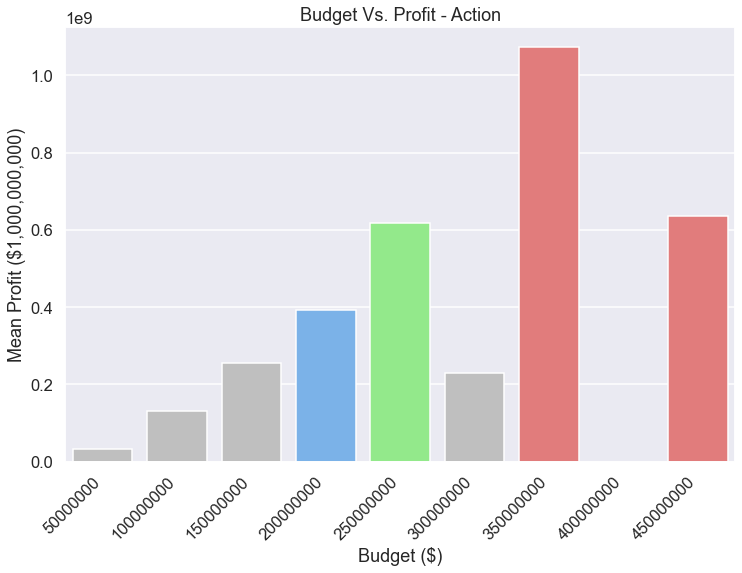

In [168]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. Profit - Action')
plt.xticks(rotation = 45, horizontalalignment = "right")
ax = sns.barplot(x = 'budget', y = 'mean_profit', data = mean_action_df, palette = clrs)
ax.set(xlabel = 'Budget ($)', ylabel = 'Mean Profit ($1,000,000,000)')

#plt.savefig('Budget_Profit_Action.png')

Green - Ideal Choice, Blue - Alternative Choice, Red - Proceed with Caution, Gray - Not Advised

Even though there are two budgets that yield higher profits in the plot, I would not suggest using them, or
at least proceed with caution. Each of those columns only have 1 movie so the data may not be accurate.

Next, repeat above steps with Adventure movies

In [163]:
adventure_df['production_budget'].corr(adventure_df['profit'])

0.5944368024709348

[Text(0.5, 0, 'Budget'), Text(0, 0.5, 'Profit')]

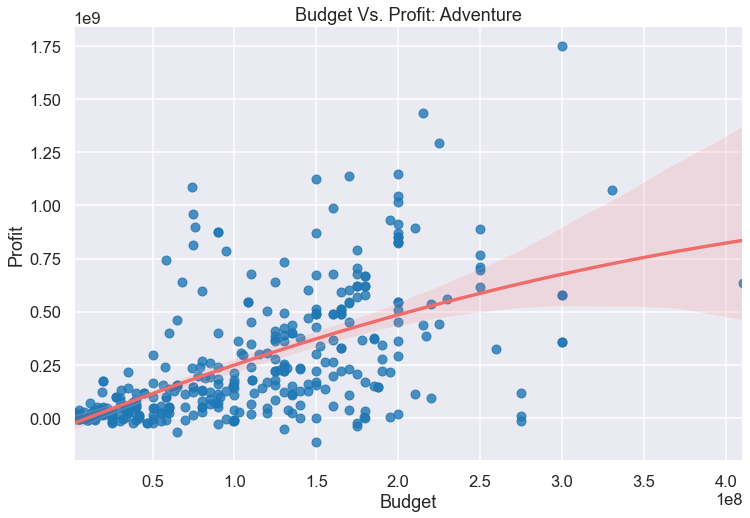

In [164]:
# Repeat above steps with Adventure
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. Profit: Adventure')
ax = sns.regplot(x = 'production_budget', y = 'profit', data = adventure_df, order = 2, scatter=True,
                line_kws={"color": "#F26B6B"})

ax.set(xlabel = 'Budget', ylabel = 'Profit')

In [165]:
mean_adventure_df = pd.DataFrame(columns = ['budget', 'mean_profit', 'num_movies'])
budget = 0
while budget < adventure_df['production_budget'].max():
    temp = adventure_df[(adventure_df['production_budget'] > budget) &
                     (adventure_df['production_budget'] < (budget + 50000000))]['profit'].mean()
    count = adventure_df[(adventure_df['production_budget'] > budget) &
                     (adventure_df['production_budget'] < (budget + 50000000))]['profit'].shape[0]
    mean_adventure_df = mean_adventure_df.append({'budget': budget + 50000000, 'mean_profit': temp, 'num_movies': count}, ignore_index=True)
    budget += 50000000
mean_adventure_df.set_index('budget')

,mean_profit,num_movies
budget,,
50000000.0,3.340391e+07,92.0
100000000.0,2.168072e+08,71.0
150000000.0,2.672026e+08,64.0
200000000.0,3.952794e+08,58.0
250000000.0,6.191004e+08,10.0
300000000.0,1.093522e+08,4.0
350000000.0,1.072414e+09,1.0
400000000.0,NaN,0.0
450000000.0,6.350639e+08,1.0


In [166]:
# change budget to int
mean_adventure_df['budget'] = mean_adventure_df['budget'].map(lambda x: int(x))

In [167]:
# sort by profit - this will be used to color plot
# set up a new palette
color_df = mean_adventure_df.sort_values(by = 'mean_profit', ascending = False)
color_df.reset_index(inplace = True)
clrs = ['#F26B6B' if (x >= color_df['mean_profit'][1]) else '#BFBFBF' if (x < color_df['mean_profit'][3]) 
        else '#69B2FA' if (x == color_df['mean_profit'][3]) else 
        '#86F97B' for x in mean_adventure_df['mean_profit']]

[Text(0.5, 0, 'Budget ($)'), Text(0, 0.5, 'Mean Profit ($1,000,000,000)')]

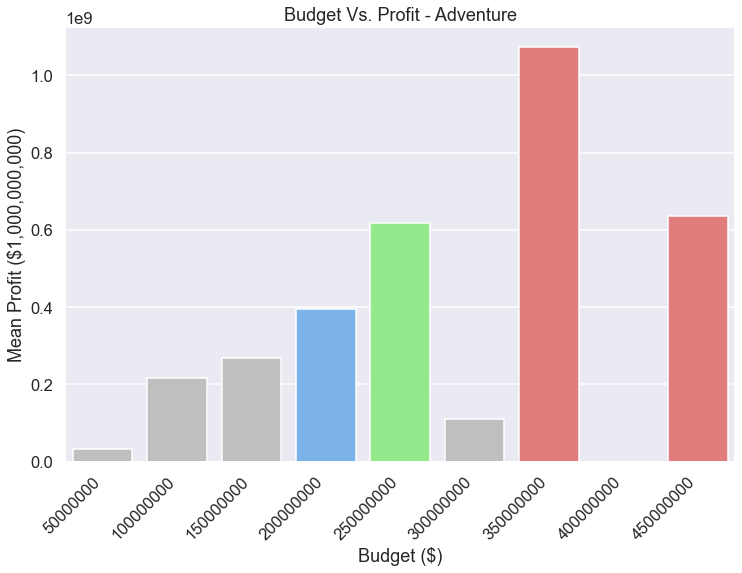

In [170]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. Profit - Adventure')
plt.xticks(rotation = 45, horizontalalignment = "right")
ax = sns.barplot(x = 'budget', y = 'mean_profit', data = mean_adventure_df, palette = clrs)
ax.set(xlabel = 'Budget ($)', ylabel = 'Mean Profit ($1,000,000,000)')
#plt.savefig('Budget_Profit_Adventure.png')

Green - Ideal Choice, Blue - Alternative Choice, Red - Proceed with Caution, Gray - Not Advised

Barplot looks almost identical to that of Action movies. The top 2 highest columns still only have one movie
accounted for and thus are not recommended.

Next, repeat above steps with Drama movies and looking at ROI instead of profit.

### If focused on ROI: Drama/Comedy

In [171]:
drama_df['production_budget'].corr(drama_df['roi'])


-0.10016678639835254

[Text(0.5, 0, 'Budget'), Text(0, 0.5, 'ROI')]

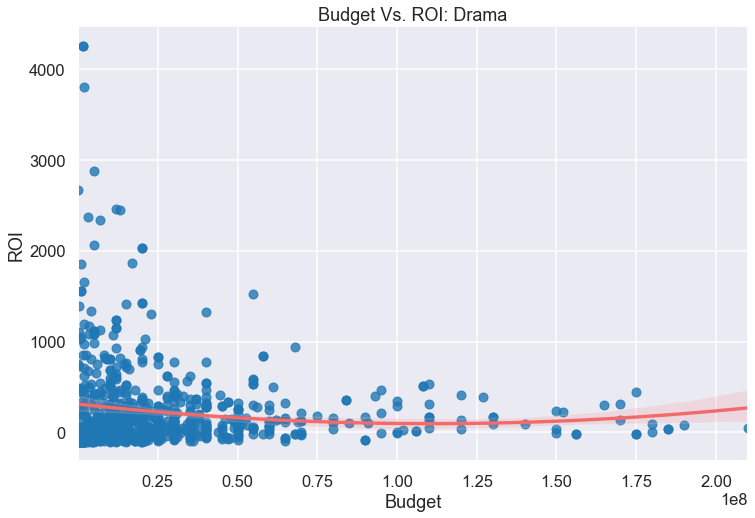

In [172]:
# Repeat above steps as Adventure/Action, but substitute ROI for Profit
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. ROI: Drama')
ax = sns.regplot(x = 'production_budget', y = 'roi', data = drama_df, order = 2, scatter = True,
                line_kws={"color": "#F26B6B"})

ax.set(xlabel = 'Budget', ylabel = 'ROI')


In [173]:
# basically the same methodology as Action and Adventure. The only things that are different are
# the increment that budget goes up and roi being measured instead of profit
mean_drama_df = pd.DataFrame(columns = ['budget', 'mean_roi', 'num_movies'])
budget = 0
while budget < drama_df['production_budget'].max():
    temp = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 25000000))]['roi'].mean()
    count = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 25000000))]['roi'].shape[0]
    mean_drama_df = mean_drama_df.append({'budget': (budget + 25000000), 'mean_roi': temp, 'num_movies': count},
                                          ignore_index=True)
    budget += 25000000
mean_drama_df.set_index('budget')


,mean_roi,num_movies
budget,,
25000000.0,283.058708,446.0
50000000.0,160.481991,146.0
75000000.0,214.556231,48.0
100000000.0,163.819245,14.0
125000000.0,217.848717,14.0
150000000.0,182.509360,5.0
175000000.0,156.178702,6.0
200000000.0,51.801101,5.0
225000000.0,53.551908,1.0


In [174]:
# change budget to int
mean_drama_df['budget'] = mean_drama_df['budget'].map(lambda x: int(x))

In [175]:
# sort by ROI - this will be used to color plot
# set up a new palette
color_df = mean_drama_df.sort_values(by = 'mean_roi', ascending = False)
color_df.reset_index(inplace=True)
clrs = ['#86F97B' if (x >= color_df['mean_roi'][0]) else '#BFBFBF' if (x < color_df['mean_roi'][2]) 
        else '#69B2FA' for x in mean_drama_df['mean_roi']]

[Text(0.5, 0, 'Budget ($)'), Text(0, 0.5, 'Mean ROI (%)')]

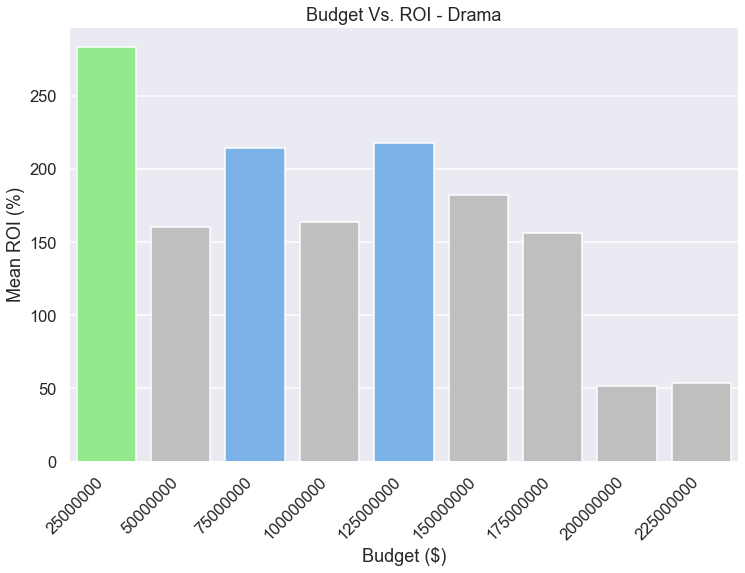

In [177]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. ROI - Drama')
plt.xticks(rotation = 45, horizontalalignment = "right")
ax = sns.barplot(x = 'budget', y = 'mean_roi', data = mean_drama_df, palette = clrs)
ax.set(xlabel = 'Budget ($)', ylabel = 'Mean ROI (%)')

#plt.savefig('Budget_ROI_Drama.png')

I noticed that the smallest budget increment had the highest ROI. Let's zoom in on this increment.

In [178]:
mean_drama_df_2 = pd.DataFrame(columns = ['budget', 'mean_roi', 'num_movies'])
budget = 0
while budget < 25000000:
    temp = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 2500000))]['roi'].mean()
    count = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 2500000))]['roi'].shape[0]
    mean_drama_df_2 = mean_drama_df_2.append({'budget': budget + 2500000, 'mean_roi': temp, 'num_movies': count},
                                          ignore_index = True)
    budget += 2500000
mean_drama_df_2.set_index('budget')

,mean_roi,num_movies
budget,,
2500000.0,376.119465,88.0
5000000.0,249.313348,34.0
7500000.0,252.615105,29.0
10000000.0,215.656527,30.0
12500000.0,412.905019,37.0
15000000.0,313.047869,20.0
17500000.0,234.744733,18.0
20000000.0,120.115443,26.0
22500000.0,136.322852,16.0


We can see that ROI peaks at a budget of $12,500,000 and starts declining. We can zoom in further.

In [179]:
mean_drama_df_2 = pd.DataFrame(columns = ['budget', 'mean_roi', 'num_movies'])
budget = 0
while budget < 15000000:
    temp = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 1500000))]['roi'].mean()
    count = drama_df[(drama_df['production_budget'] > budget) &
                     (drama_df['production_budget'] < (budget + 1500000))]['roi'].shape[0]
    mean_drama_df_2 = mean_drama_df_2.append({'budget': budget + 1500000, 'mean_roi': temp, 'num_movies': count},
                                          ignore_index = True)
    budget += 1500000
mean_drama_df_2.set_index('budget')

,mean_roi,num_movies
budget,,
1500000.0,249.581151,55.0
3000000.0,330.212204,34.0
4500000.0,344.001951,16.0
6000000.0,432.401873,30.0
7500000.0,285.761145,20.0
9000000.0,213.300541,18.0
10500000.0,159.273067,41.0
12000000.0,364.033834,11.0
13500000.0,316.281334,17.0


In [180]:
# change budget to int
mean_drama_df_2['budget'] = mean_drama_df_2['budget'].map(lambda x: int(x))

In [181]:
# sort by ROI - this will be used to color plot
# set up a new palette
color_df = mean_drama_df_2.sort_values(by = 'mean_roi', ascending = False)
color_df.reset_index(inplace=True)
clrs = ['#86F97B' if (x >= color_df['mean_roi'][0]) else '#BFBFBF' if (x < color_df['mean_roi'][3]) 
        else '#69B2FA' for x in mean_drama_df_2['mean_roi']]

[Text(0.5, 0, 'Budget ($)'), Text(0, 0.5, 'Mean ROI (%)')]

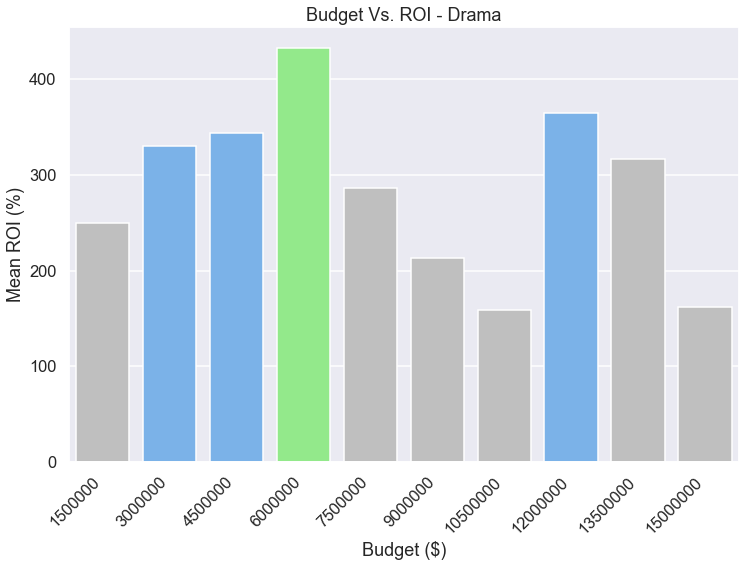

In [183]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. ROI - Drama')
plt.xticks(rotation = 45, horizontalalignment = "right")
ax = sns.barplot(x = 'budget', y = 'mean_roi', data = mean_drama_df_2, palette = clrs)
ax.set(xlabel = 'Budget ($)', ylabel = 'Mean ROI (%)')

#plt.savefig('Budget_ROI_Drama_Zoom.png')

We can see a peak in ROI when the budget is 6 million dollors or less. Ideally, the drama movie budget will be between 4.5 million dollars and 6 million dollars. If a lower or higher budget is desired, I would recommend a budget of at least 1.5 million or a budget between 12 and 13.5 million, respectively.

Final Recommendation: Budget between 6 and 7.5 million dollars

[Text(0.5, 0, 'Budget'), Text(0, 0.5, 'ROI')]

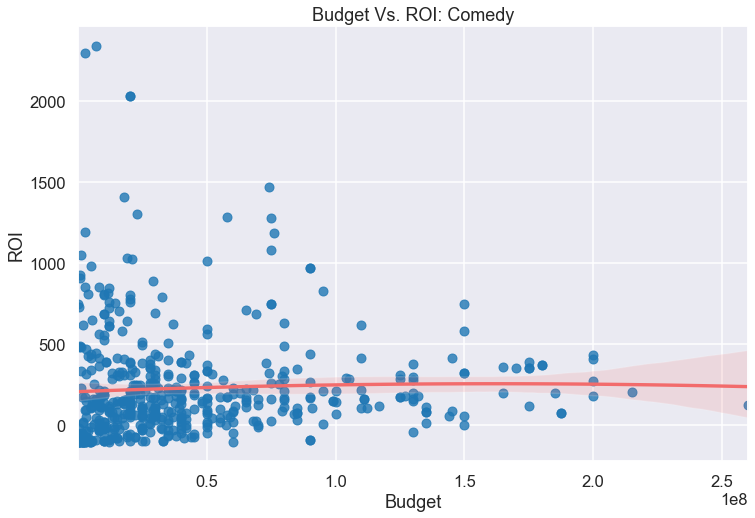

In [184]:
# Repeat above steps for Comedy
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. ROI: Comedy')
ax = sns.regplot(x = 'production_budget', y = 'roi', data = comedy_df, order = 2, scatter = True
                , line_kws = {"color": "#F26B6B"})

ax.set(xlabel = 'Budget', ylabel = 'ROI')

In [185]:
mean_comedy_df = pd.DataFrame(columns = ['budget', 'mean_roi', 'num_movies'])
budget = 0
while budget < comedy_df['production_budget'].max():
    temp = comedy_df[(comedy_df['production_budget'] > budget) &
                     (comedy_df['production_budget'] < (budget + 25000000))]['roi'].mean()
    count = comedy_df[(comedy_df['production_budget'] > budget) &
                     (comedy_df['production_budget'] < (budget + 25000000))]['roi'].shape[0]
    mean_comedy_df = mean_comedy_df.append({'budget': budget + 25000000, 'mean_roi': temp, 'num_movies': count},
                                          ignore_index = True)
    budget += 25000000
mean_comedy_df.set_index('budget')

,mean_roi,num_movies
budget,,
25000000.0,240.554787,225.0
50000000.0,164.981796,110.0
75000000.0,216.403102,39.0
100000000.0,287.573304,32.0
125000000.0,247.949727,10.0
150000000.0,164.729390,16.0
175000000.0,304.232553,3.0
200000000.0,219.379734,5.0
225000000.0,204.285342,1.0


In [186]:
# change budget to int
mean_comedy_df['budget'] = mean_comedy_df['budget'].map(lambda x: int(x))

In [187]:
# sort by ROI - this will be used to color plot
# set up a new palette
color_df = mean_comedy_df.sort_values(by = 'mean_roi', ascending = False)
color_df.reset_index(inplace=True)
clrs = ['#F26B6B' if (x > color_df['mean_roi'][1]) else '#BFBFBF' if (x < color_df['mean_roi'][3]) 
        else '#69B2FA' if (x < color_df['mean_roi'][1]) else 
        '#86F97B' for x in mean_comedy_df['mean_roi']]

[Text(0.5, 0, 'Budget ($)'), Text(0, 0.5, 'Mean ROI (%)')]

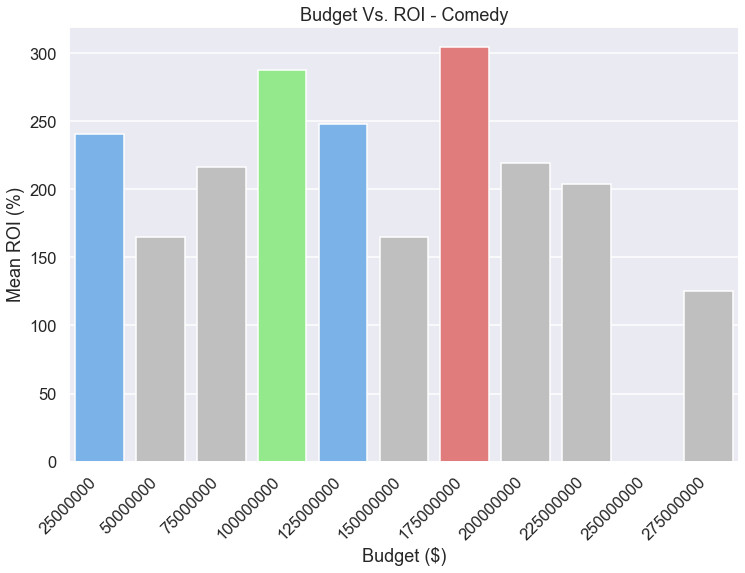

In [190]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Budget Vs. ROI - Comedy')
plt.xticks(rotation = 45, horizontalalignment = "right")
ax = sns.barplot(x = 'budget', y = 'mean_roi', data = mean_comedy_df, palette = clrs)
ax.set(xlabel = 'Budget ($)', ylabel = 'Mean ROI (%)')

#plt.savefig('Budget_ROI_Comedy.png')

Green - Ideal Choice, Blue - Alternative Choice(s), Red - Proceed with Caution, Gray - Not Advised

IDEAL CHOICE (Comedy): Budget between 7.5 and 10 million dollars\
ALTERNATIVE CHOICE(S): Budget up to 2.5 million dollars; 
                       Budget between 10 and 12.5 million dollars\
CAUTION: Budget between 17.5 and 20 million dollars (ROI was the highest for this budget, but there were only three movies in this bar)

Now that the genres and budgets are decided, figure out when the movie should be released.

## When should the movie be released?

In [191]:
action_df['release_date_y'][0][:3]

'Jan'

In [192]:
# Add column for month for all 4 datasets used above
action_df['month'] = action_df['release_date_y'].map(lambda x: x[:3])
adventure_df['month'] = adventure_df['release_date_y'].map(lambda x: x[:3])
drama_df['month'] = drama_df['release_date_y'].map(lambda x: x[:3])
comedy_df['month'] = comedy_df['release_date_y'].map(lambda x: x[:3])

### Action Movie

In [193]:
action_df.head()

,ROI,averagerating,domestic_gross,final_avg_rating,genre_ids,genres,genres_split,id_x,id_y,movie,...,release_year,roi,start_year,tconst,title,total_votes,vote_average,vote_count,worldwide_gross,month
0,-15.780973,4.2,18848538.0,4.204721,"[28, 12]","Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",188207.0,42.0,The Legend of Hercules,...,2014,-15.780973,2014,tt1043726,The Legend of Hercules,51157.0,4.5,805.0,58953319.0,Jan
4,382.886736,7.2,138447667.0,7.194609,"[28, 35, 80]","Action,Comedy,Crime","[Action, Comedy, Crime]",64688.0,44.0,21 Jump Street,...,2012,382.886736,2012,tt1232829,21 Jump Street,484298.0,6.8,6527.0,202812429.0,Mar
17,294.769113,8.0,183637894.0,7.989500,"[37, 18, 12]","Action,Adventure,Biography","[Action, Adventure, Biography]",281957.0,27.0,The Revenant,...,2015,294.769113,2015,tt1663202,The Revenant,632257.0,7.4,11064.0,532938302.0,Dec
18,294.769113,8.0,183637894.0,7.989500,"[37, 18, 12]","Action,Adventure,Biography","[Action, Adventure, Biography]",281957.0,27.0,The Revenant,...,2015,294.769113,2015,tt1663202,The Revenant,632257.0,7.4,11064.0,532938302.0,Dec
22,270.967760,6.6,26593646.0,6.596967,"[28, 35, 53]","Action,Crime,Thriller","[Action, Crime, Thriller]",23631.0,18.0,Machete,...,2010,270.967760,2010,tt0985694,Machete,184182.0,6.3,1862.0,46370970.0,Sep


In [194]:
action_df['month'].value_counts()

Sep    49
May    43
Jul    42
Aug    41
Dec    40
Jun    40
Mar    38
Oct    37
Nov    37
Jan    31
Feb    24
Apr    23
Name: month, dtype: int64

In [195]:
action_month_df = action_df.groupby(['month']).mean()
action_month_df

,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross
month,,,,,,,,,,,,,,,
Apr,233.123187,6.569565,1.087226e+08,6.568221,184180.304348,48.869565,219041.695652,16.474217,8.076087e+07,2.870724e+08,233.123187,222646.391304,6.391304,3604.695652,3.678333e+08
Aug,109.889949,6.158537,6.229852e+07,6.159020,172072.756098,61.512195,159053.000000,16.455659,6.321951e+07,9.329839e+07,109.889949,161846.731707,6.090244,2793.731707,1.565179e+08
Dec,158.505039,6.075000,1.066061e+08,6.075095,256397.800000,43.950000,158137.275000,15.080550,7.125750e+07,1.892235e+08,158.505039,161125.325000,6.022500,2988.050000,2.604810e+08
Feb,242.405230,6.283333,1.057611e+08,6.281615,142111.458333,56.166667,172496.666667,17.106667,6.716667e+07,1.625949e+08,242.405230,175802.875000,6.141667,3306.208333,2.297615e+08
Jan,100.298731,5.900000,4.300623e+07,5.898260,168538.129032,47.258065,90254.161290,13.866258,5.032258e+07,5.343515e+07,100.298731,91837.516129,5.774194,1583.354839,1.037577e+08
Jul,219.354481,6.371429,1.115718e+08,6.370921,186881.523810,46.333333,266989.500000,19.239429,1.072976e+08,1.961902e+08,219.354481,271850.309524,6.280952,4860.809524,3.034879e+08
Jun,218.373612,6.470000,1.416683e+08,6.468215,182466.025000,57.025000,217128.000000,17.173750,1.096250e+08,2.751235e+08,218.373612,221213.300000,6.410000,4085.300000,3.847485e+08
Mar,127.871571,6.242105,8.847836e+07,6.239292,187607.342105,50.421053,206875.947368,16.882947,9.181053e+07,1.490528e+08,127.871571,210653.263158,6.123684,3777.315789,2.408633e+08
May,156.634617,6.374419,1.394372e+08,6.372119,178996.023256,45.627907,268103.395349,20.938256,1.254744e+08,2.781039e+08,156.634617,273286.883721,6.218605,5183.488372,4.035783e+08


In [196]:
action_month_df.reset_index(inplace = True)

In [197]:
datetime.datetime.strptime(action_month_df['month'][0], "%b").month

4

In [198]:
# Order dataframe by month - do this by inserting column corresponding month to number (Jan = 1, Feb = 2, etc.)
action_month_df['month_num'] = action_month_df['month'].map(lambda x: 
                                                datetime.datetime.strptime(x, "%b").month)
action_month_df.sort_values(by = 'month_num', inplace = True)

In [199]:
action_month_df

,month,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross,month_num
4,Jan,100.298731,5.900000,4.300623e+07,5.898260,168538.129032,47.258065,90254.161290,13.866258,5.032258e+07,5.343515e+07,100.298731,91837.516129,5.774194,1583.354839,1.037577e+08,1
3,Feb,242.405230,6.283333,1.057611e+08,6.281615,142111.458333,56.166667,172496.666667,17.106667,6.716667e+07,1.625949e+08,242.405230,175802.875000,6.141667,3306.208333,2.297615e+08,2
7,Mar,127.871571,6.242105,8.847836e+07,6.239292,187607.342105,50.421053,206875.947368,16.882947,9.181053e+07,1.490528e+08,127.871571,210653.263158,6.123684,3777.315789,2.408633e+08,3
0,Apr,233.123187,6.569565,1.087226e+08,6.568221,184180.304348,48.869565,219041.695652,16.474217,8.076087e+07,2.870724e+08,233.123187,222646.391304,6.391304,3604.695652,3.678333e+08,4
8,May,156.634617,6.374419,1.394372e+08,6.372119,178996.023256,45.627907,268103.395349,20.938256,1.254744e+08,2.781039e+08,156.634617,273286.883721,6.218605,5183.488372,4.035783e+08,5
6,Jun,218.373612,6.470000,1.416683e+08,6.468215,182466.025000,57.025000,217128.000000,17.173750,1.096250e+08,2.751235e+08,218.373612,221213.300000,6.410000,4085.300000,3.847485e+08,6
5,Jul,219.354481,6.371429,1.115718e+08,6.370921,186881.523810,46.333333,266989.500000,19.239429,1.072976e+08,1.961902e+08,219.354481,271850.309524,6.280952,4860.809524,3.034879e+08,7
1,Aug,109.889949,6.158537,6.229852e+07,6.159020,172072.756098,61.512195,159053.000000,16.455659,6.321951e+07,9.329839e+07,109.889949,161846.731707,6.090244,2793.731707,1.565179e+08,8
11,Sep,122.820774,6.187755,3.448707e+07,6.209738,213382.020408,50.551020,121507.979592,13.815061,4.065235e+07,5.502205e+07,122.820774,123511.653061,6.155102,2003.673469,9.567440e+07,9
10,Oct,156.993040,6.167568,4.544516e+07,6.166152,210756.000000,62.135135,134395.567568,16.598000,5.401351e+07,9.967454e+07,156.993040,136868.567568,6.045946,2473.000000,1.536881e+08,10


In [200]:
# sort by profit - this will be used to color plot
# set up a new palette
action_profit = action_month_df.sort_values(by = 'roi', ascending = False)
action_profit.reset_index(inplace = True)
clrs = ['#86F97B' if (x > action_profit['profit'][4]) else '#BFBFBF' if (x < action_profit['profit'][4]) 
        else '#69B2FA' for x in action_month_df['profit']]

In [201]:
action_profit

,index,month,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross,month_num
0,3,Feb,242.405230,6.283333,1.057611e+08,6.281615,142111.458333,56.166667,172496.666667,17.106667,6.716667e+07,1.625949e+08,242.405230,175802.875000,6.141667,3306.208333,2.297615e+08,2
1,0,Apr,233.123187,6.569565,1.087226e+08,6.568221,184180.304348,48.869565,219041.695652,16.474217,8.076087e+07,2.870724e+08,233.123187,222646.391304,6.391304,3604.695652,3.678333e+08,4
2,5,Jul,219.354481,6.371429,1.115718e+08,6.370921,186881.523810,46.333333,266989.500000,19.239429,1.072976e+08,1.961902e+08,219.354481,271850.309524,6.280952,4860.809524,3.034879e+08,7
3,6,Jun,218.373612,6.470000,1.416683e+08,6.468215,182466.025000,57.025000,217128.000000,17.173750,1.096250e+08,2.751235e+08,218.373612,221213.300000,6.410000,4085.300000,3.847485e+08,6
4,9,Nov,166.919617,6.583784,1.366451e+08,6.566629,161197.675676,39.513514,234236.810811,21.622838,1.192649e+08,2.603271e+08,166.919617,239216.945946,6.470270,4980.135135,3.795919e+08,11
5,2,Dec,158.505039,6.075000,1.066061e+08,6.075095,256397.800000,43.950000,158137.275000,15.080550,7.125750e+07,1.892235e+08,158.505039,161125.325000,6.022500,2988.050000,2.604810e+08,12
6,10,Oct,156.993040,6.167568,4.544516e+07,6.166152,210756.000000,62.135135,134395.567568,16.598000,5.401351e+07,9.967454e+07,156.993040,136868.567568,6.045946,2473.000000,1.536881e+08,10
7,8,May,156.634617,6.374419,1.394372e+08,6.372119,178996.023256,45.627907,268103.395349,20.938256,1.254744e+08,2.781039e+08,156.634617,273286.883721,6.218605,5183.488372,4.035783e+08,5
8,7,Mar,127.871571,6.242105,8.847836e+07,6.239292,187607.342105,50.421053,206875.947368,16.882947,9.181053e+07,1.490528e+08,127.871571,210653.263158,6.123684,3777.315789,2.408633e+08,3
9,11,Sep,122.820774,6.187755,3.448707e+07,6.209738,213382.020408,50.551020,121507.979592,13.815061,4.065235e+07,5.502205e+07,122.820774,123511.653061,6.155102,2003.673469,9.567440e+07,9


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Profit')]

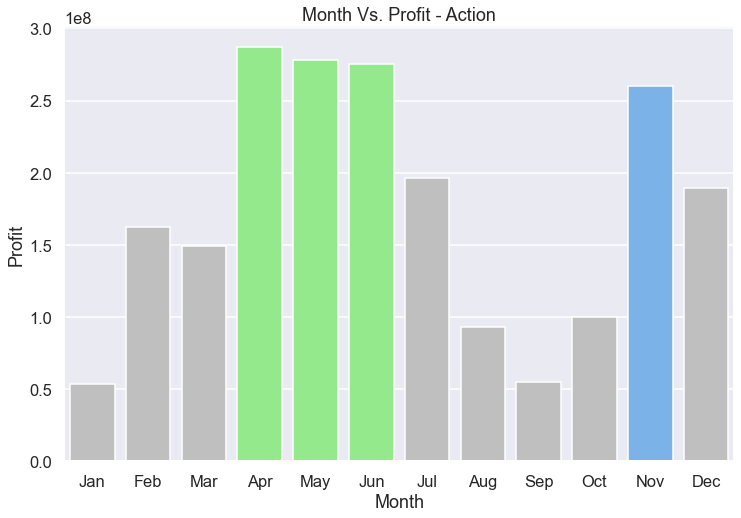

In [203]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Month Vs. Profit - Action')
ax = sns.barplot(x = 'month', y = 'profit', data = action_month_df, palette = clrs)
ax.set(xlabel = 'Month', ylabel = 'Profit')

#plt.savefig('Month_Profit_Action.png')

In [204]:
# April, May, June, November

### Adventure Movie

In [205]:
# Repeat steps for Adventure
adventure_df['month'].value_counts()

Nov    53
Dec    45
Jul    40
Jun    38
Mar    37
May    34
Aug    27
Oct    22
Sep    20
Feb    19
Apr    13
Jan    10
Name: month, dtype: int64

In [206]:
adventure_month_df = adventure_df.groupby(['month']).mean()
adventure_month_df

,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross
month,,,,,,,,,,,,,,,
Apr,236.938786,6.615385,1.640323e+08,6.613500,162601.692308,48.461538,222339.076923,20.699231,1.117692e+08,3.775240e+08,236.938786,226373.461538,6.446154,4034.384615,4.892932e+08
Aug,157.540302,6.200000,7.402477e+07,6.199351,207157.740741,63.000000,158145.370370,17.268741,7.309259e+07,1.158236e+08,157.540302,161320.777778,6.051852,3175.407407,1.889162e+08
Dec,228.639722,6.377778,1.198696e+08,6.378094,203851.822222,35.888889,184732.244444,17.714600,9.363111e+07,2.452685e+08,228.639722,188308.888889,6.315556,3576.644444,3.388996e+08
Feb,284.983985,6.336842,1.238286e+08,6.335565,185356.631579,57.157895,164021.631579,18.866842,7.142105e+07,1.917944e+08,284.983985,167554.105263,6.226316,3532.473684,2.632155e+08
Jan,136.215897,5.580000,5.116613e+07,5.583585,134636.200000,49.600000,89422.600000,13.757400,6.010000e+07,9.348522e+07,136.215897,91136.800000,5.670000,1714.200000,1.535852e+08
Jul,280.361824,6.367500,1.262774e+08,6.367739,169770.150000,47.300000,220776.375000,18.446725,1.082875e+08,2.748502e+08,280.361824,225268.475000,6.315000,4492.100000,3.831377e+08
Jun,332.097229,6.707895,2.005102e+08,6.705651,152303.973684,46.368421,260022.578947,18.744526,1.389289e+08,4.190319e+08,332.097229,265213.605263,6.544737,5191.026316,5.579608e+08
Mar,174.731696,6.332432,1.262009e+08,6.331937,180001.405405,49.189189,210564.540541,15.528378,1.202027e+08,2.201815e+08,174.731696,214429.864865,6.302703,3865.324324,3.403842e+08
May,203.737926,6.752941,1.830572e+08,6.749922,128778.470588,43.264706,342043.382353,24.396059,1.643735e+08,3.675713e+08,203.737926,348610.352941,6.567647,6566.970588,5.319448e+08


In [207]:
adventure_month_df.reset_index(inplace = True)

In [208]:
# Order dataframe by month - do this by inserting column corresponding month to number (Jan = 1, Feb = 2, etc.)
adventure_month_df['month_num'] = adventure_month_df['month'].map(lambda x: 
                                                datetime.datetime.strptime(x, "%b").month)
adventure_month_df.sort_values(by = 'month_num', inplace = True)

In [209]:
# sort by profit - this will be used to color plot
# set up a new palette
adventure_profit = adventure_month_df.sort_values(by = 'roi', ascending = False)
adventure_profit.reset_index(inplace = True)
clrs = ['#86F97B' if (x > adventure_profit['profit'][3]) else '#BFBFBF' if (
    x < adventure_profit['profit'][3]) else '#69B2FA' for x in adventure_month_df['profit']]

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Profit')]

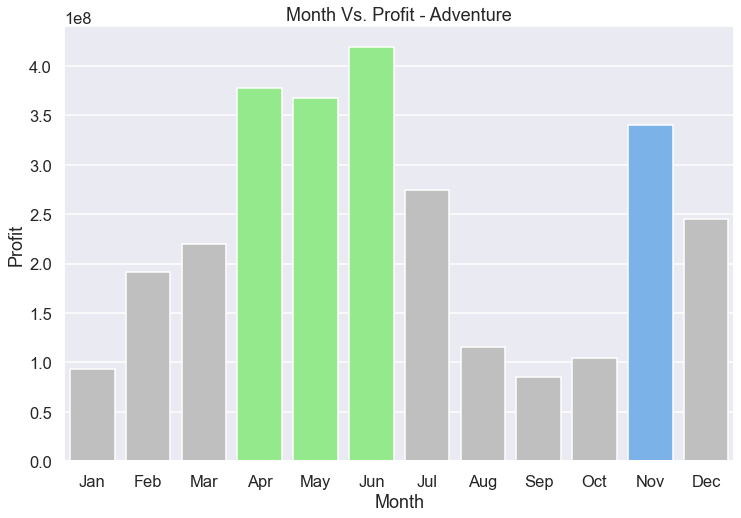

In [211]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Month Vs. Profit - Adventure')
ax = sns.barplot(x = 'month', y = 'profit', data = adventure_month_df, palette = clrs)
ax.set(xlabel = 'Month', ylabel = 'Profit')

#plt.savefig('Month_Profit_Adventure.png')

In [212]:
# April, May, June, November

### Drama Movie

In [213]:
# Repeat steps for Drama
drama_df['month'].value_counts()

Dec    115
Nov    113
Oct    108
Sep     75
Aug     62
Mar     51
Jun     49
Apr     40
Jul     40
Feb     38
May     30
Jan     24
Name: month, dtype: int64

In [214]:
drama_month_df = drama_df.groupby(['month']).mean()
drama_month_df

,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross
month,,,,,,,,,,,,,,,
Apr,166.538212,6.370000,3.795251e+07,6.392644,202527.625000,47.500000,68606.675000,10.305275,2.938000e+07,4.876231e+07,166.538212,69842.625000,6.460000,1235.950000,7.814231e+07
Aug,262.177133,6.427419,3.298322e+07,6.428362,204688.532258,50.016129,77894.322581,10.393306,2.292935e+07,3.943772e+07,262.177133,79051.193548,6.453226,1156.870968,6.236707e+07
Dec,221.778386,6.785217,4.852791e+07,6.778136,228414.121739,50.060870,139755.400000,12.390765,3.203743e+07,6.627434e+07,221.778386,142066.678261,6.665217,2311.278261,9.831177e+07
Feb,255.468391,6.094737,4.423357e+07,6.101425,184824.447368,54.894737,86289.105263,11.237342,3.261316e+07,6.696418e+07,255.468391,87884.736842,6.197368,1595.631579,9.957733e+07
Jan,121.229595,6.150000,3.641808e+07,6.109874,195302.583333,55.416667,65926.000000,11.721750,3.610000e+07,2.724745e+07,121.229595,67026.125000,6.075000,1100.125000,6.334745e+07
Jul,386.959079,6.477500,3.670716e+07,6.477760,208981.525000,57.000000,91235.650000,10.459125,2.934488e+07,5.940156e+07,386.959079,92762.300000,6.415000,1526.650000,8.874643e+07
Jun,275.487369,6.663265,3.307648e+07,6.656272,207798.571429,51.510204,76997.571429,10.148673,2.303759e+07,4.657505e+07,275.487369,78314.020408,6.663265,1316.448980,6.961264e+07
Mar,195.671232,6.396078,3.454167e+07,6.393089,215778.607843,48.156863,77993.000000,11.538686,3.164000e+07,4.505201e+07,195.671232,79473.666667,6.364706,1480.666667,7.669201e+07
May,149.261906,6.143333,3.649062e+07,6.147165,171418.500000,51.366667,85540.433333,11.034233,4.319333e+07,4.518931e+07,149.261906,86995.166667,6.186667,1454.733333,8.838264e+07


In [215]:
drama_month_df.reset_index(inplace = True)

In [216]:
# Order dataframe by month - do this by inserting column corresponding month to number (Jan = 1, Feb = 2, etc.)
drama_month_df['month_num'] = drama_month_df['month'].map(lambda x: 
                                                datetime.datetime.strptime(x, "%b").month)
drama_month_df.sort_values(by = 'month_num', inplace = True)

In [217]:
# sort by ROI - this will be used to color plot
drama_roi = drama_month_df.sort_values(by = 'roi', ascending = False)
drama_roi.reset_index(inplace = True)

In [218]:
drama_roi['roi'][3]

262.1771331577977

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'ROI')]

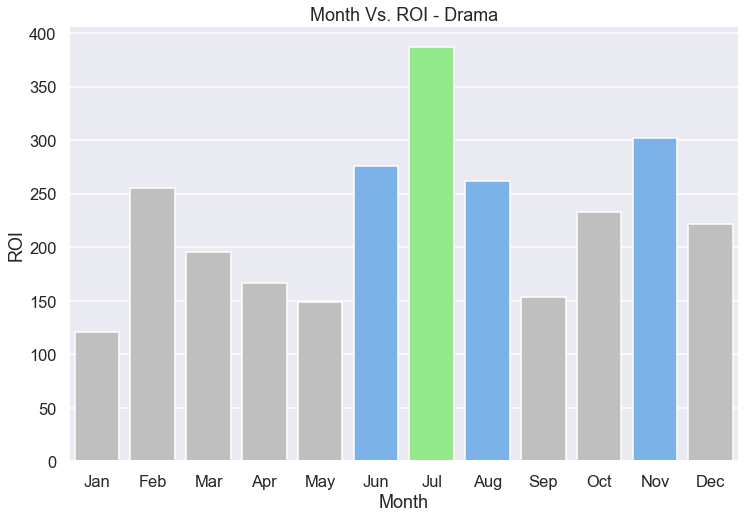

In [220]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Month Vs. ROI - Drama')
clrs = ['#BFBFBF' if (x < drama_roi['roi'][3]) else '#86F97B' if (
    x == drama_roi['roi'][0]) else '#69B2FA' for x in drama_month_df['roi']]
ax = sns.barplot(x = 'month', y = 'roi', data = drama_month_df, palette = clrs)
ax.set(xlabel = 'Month', ylabel = 'ROI')

#plt.savefig('Month_ROI_Drama.png')

In [221]:
# Summer or November

### Comedy Movie

In [222]:
# Repeat steps for Comedy
comedy_df['month'].value_counts()

Dec    70
Nov    58
Jul    55
Jun    50
Sep    41
Apr    38
Oct    37
Mar    37
May    36
Aug    35
Feb    26
Jan    20
Name: month, dtype: int64

In [223]:
comedy_month_df = comedy_df.groupby(['month']).mean()
comedy_month_df

,ROI,averagerating,domestic_gross,final_avg_rating,id_x,id_y,numvotes,popularity,production_budget,profit,roi,total_votes,vote_average,vote_count,worldwide_gross
month,,,,,,,,,,,,,,,
Apr,184.517786,5.944737,4.319160e+07,5.877475,173085.157895,50.105263,60514.868421,10.703868,3.353947e+07,5.489052e+07,184.517786,61464.947368,5.960526,950.078947,8.843000e+07
Aug,176.467575,6.468571,5.915754e+07,6.466775,154522.914286,50.485714,127862.514286,12.908571,3.841429e+07,7.143724e+07,176.467575,129820.971429,6.325714,1958.457143,1.098515e+08
Dec,204.012964,6.181429,6.221886e+07,6.183074,244831.571429,50.157143,75548.085714,11.726943,3.808571e+07,9.951174e+07,204.012964,77138.242857,6.172857,1590.157143,1.375975e+08
Feb,190.177641,6.046154,6.990255e+07,6.045210,186198.269231,56.423077,119162.153846,13.015731,4.316538e+07,1.011395e+08,190.177641,121477.653846,5.961538,2315.500000,1.443049e+08
Jan,335.711774,5.530000,4.750967e+07,5.533428,150490.550000,51.500000,68537.650000,10.836950,3.152500e+07,5.021121e+07,335.711774,69658.700000,5.665000,1121.050000,8.173621e+07
Jul,310.618160,6.114545,7.840832e+07,6.105309,179242.527273,46.290909,100829.527273,13.330709,4.763218e+07,1.587302e+08,310.618160,102989.400000,6.110909,2159.872727,2.063624e+08
Jun,297.342073,6.458000,9.382150e+07,6.457611,194849.360000,51.620000,132442.080000,13.282540,5.916900e+07,1.646395e+08,297.342073,134889.020000,6.410000,2446.940000,2.238085e+08
Mar,152.493216,6.227027,5.422826e+07,6.226114,175996.648649,46.486486,94549.675676,9.828000,3.952000e+07,7.553686e+07,152.493216,96186.189189,6.118919,1636.513514,1.150569e+08
May,258.075327,5.952778,7.350658e+07,5.956439,179989.250000,55.555556,121936.388889,13.055194,4.494444e+07,1.254222e+08,258.075327,124079.611111,6.077778,2143.222222,1.703667e+08


In [224]:
comedy_month_df.reset_index(inplace = True)

In [225]:
# Order dataframe by month - do this by inserting column corresponding month to number (Jan = 1, Feb = 2, etc.)
comedy_month_df['month_num'] = comedy_month_df['month'].map(lambda x: 
                                                datetime.datetime.strptime(x, "%b").month)
comedy_month_df.sort_values(by = 'month_num', inplace = True)

In [226]:
# sort by ROI - this will be used to color plot
# set up a new palette
comedy_roi = comedy_month_df.sort_values(by = 'roi', ascending = False)
comedy_roi.reset_index(inplace = True)
clrs = ['#BFBFBF' if (x < comedy_roi['roi'][3]) else '#86F97B' if (
    x == comedy_roi['roi'][0]) else '#69B2FA' for x in comedy_month_df['roi']]

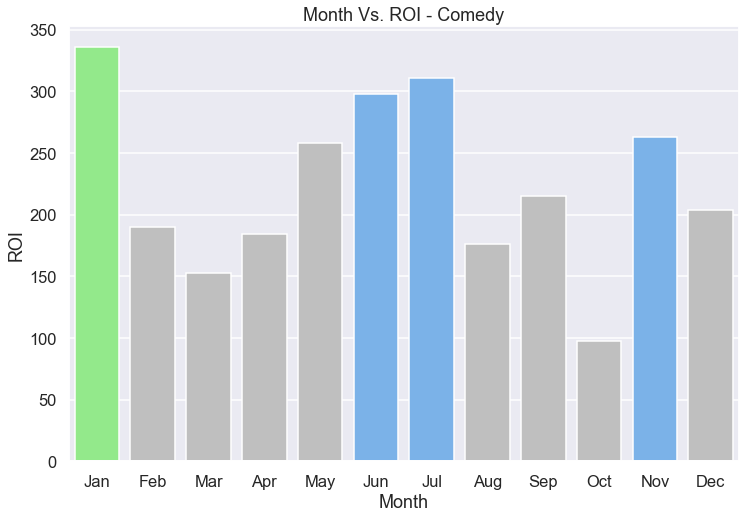

In [227]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Month Vs. ROI - Comedy')
ax = sns.barplot(x = 'month', y = 'roi', data = comedy_month_df, palette = clrs)
ax.set(xlabel = 'Month', ylabel = 'ROI')

plt.savefig('Month_ROI_Comedy.png')

In [199]:
# January, June, July, November